<a href="https://colab.research.google.com/github/FurukuOnTour/nlpsys-project-legalnlp/blob/main/Model/Logistic_Re_for_NLP_III_Project_All2Favor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### IMPORT

In [ ]:
!pip install pythainlp
import pythainlp as pyth
import pandas as pd
import re

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 25.4 MB/s 


### CHECK AND PREPARE DATA

In [ ]:
!gdown https://drive.google.com/uc?id=1bfPtPoRoIZ_3nZLozDqD8SukmA9B8tRr
!gdown https://drive.google.com/uc?id=19Q78VuatujnL08ndnwj6VWHZlio6J4Au

Downloading...
From: https://drive.google.com/uc?id=1bfPtPoRoIZ_3nZLozDqD8SukmA9B8tRr
To: /content/all2favor-train.csv
100% 3.95M/3.95M [00:00<00:00, 14.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=19Q78VuatujnL08ndnwj6VWHZlio6J4Au
To: /content/all2favor-dev.csv
100% 913k/913k [00:00<00:00, 77.8MB/s]


In [ ]:
train = pd.read_csv('/content/all2favor-train.csv')

In [ ]:
dev = pd.read_csv('/content/all2favor-dev.csv')

In [ ]:
train.head()

,text,label
0,2523/139 ย่อสั้น คนของโจทก์รับเงินจากลูกค้าแล้...,partially favorable
1,2545/3535 ย่อสั้น ตามสัญญาซื้อขายระบุว่า ป. ซื...,unfavorable
2,2558/10955 ย่อสั้น ตาม พ . ร . บ . องค์การสงเค...,unfavorable
3,2548/4823 ย่อสั้น จำเลยที่ 1 เป็นเจ้าพนักงานที...,partially favorable
4,2511/1204 ย่อสั้น ค่าเสียหายฐานทำละเมิดปิดทางภ...,partially favorable


In [ ]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Feature engineering
def featurize(text):
  return {x:1 for x in pyth.word_tokenize(text)}

vectorizer = DictVectorizer(sparse=True)
train_features = train['text'].apply(featurize)
feature_vectors = vectorizer.fit_transform(train_features)

# Train model
lr_text_classifier = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_text_classifier.fit(feature_vectors, train['label'])

# Evaluation
dev_features = dev['text'].apply(featurize)
dev_feature_vectors = vectorizer.transform(dev_features)
dev_predictions = lr_text_classifier.predict(dev_feature_vectors)
print (classification_report(dev_predictions, dev['label']))

                     precision    recall  f1-score   support

          favorable       0.55      0.85      0.67        13
              other       0.80      0.80      0.80        15
partially favorable       0.87      0.62      0.73        32
        unfavorable       0.83      0.94      0.88        16

           accuracy                           0.76        76
          macro avg       0.76      0.80      0.77        76
       weighted avg       0.79      0.76      0.76        76



# ผลลัพธ์ Verdict2Favor

featurize แบบเดิม ๆ

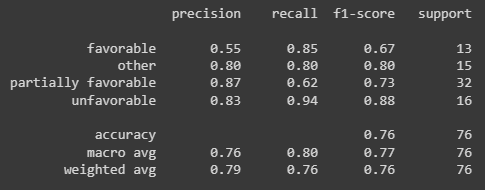